In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
%precision 2

'%.2f'

In [3]:
def american_put_boundary(S_0, K, rf, sigma, T, n):
    
    # Generating Stock Tree:
    
    dt = T / n  # number of time periods
    u = np.exp(sigma * np.sqrt(dt))  # calculating up-factor
    d = 1 / u  # calculating down-factor
    S = np.zeros((n + 1, n + 1))  # array of zeros
    S[0, 0] = S_0 # defininf Stock price on dt = o
    for j in range(1, n + 1):
        S[:, j] = S[:, j - 1] * u
        S[j, j] = S[j - 1, j - 1] * d
    
    
    # Risk-neutral probability:
    
    q = (np.exp(rf * dt) - d) / (u - d)  # calculating risk-neutral probability
    
    # Array for storing values
    
    P = np.zeros((n + 1, n + 1)) # for payoff of American Put option
    check = np.zeros((n + 1, n + 1))  #  values to evaluate the exercise boundary points
    boundary = []   # for storing boundary points
    time = []  # for storing time corresponding to the exercise boundary point
    
    
    # Calculating option payoffs at expiration:
    
    P[:, n] = np.clip(K - S[:, n], 0, None)
    
    for j in range(n - 1, -1, -1):
        for i in range(j + 1):
            P[i, j] = max(np.exp(-rf * dt) * (q * P[i, j + 1] + (1 - q) * P[i + 1, j + 1]), K - S[i, j])
            check[i, j] = np.exp(-rf * dt) * (q * P[i, j + 1] + (1 - q) * P[i + 1, j + 1]) - max(K - S[i, j], 0)
            
            
    # Finding the first negative element in each column of check to extract boundary point from Stock Tree.
    # First negative element indicates that the payoff is more if exercised compared to holding it.
    
    j = 0
    while j < n:
        i = 0
        while i <= j:
            if check[i, j] < 0:
                boundary.append(S[i, j])
                time.append(j * dt)  # Append the time step when the boundary value is found
                break
            i += 1
        else:
            boundary.append(None)  # Append None if no negative element found
            time.append(j * dt)
        j += 1
    
    # Set the boundary point for the last column to K
    boundary.append(K)
    time.append(T)
    
    print("Data for Stock Tree")
    print(pd.DataFrame(np.round(S,decimals=1)).head())
    
    print("Payoff of American Option")
    print(pd.DataFrame(np.round(P,decimals=1)))
    
    return time, boundary

In [4]:

am_op_20_100 = pd.DataFrame(american_put_boundary(S_0=100, K=100, rf=0.1, sigma=0.2, T=(1 / 4), n=100)).T
am_op_20_1000 = pd.DataFrame(american_put_boundary(S_0=100, K=100, rf=0.1, sigma=0.2, T=(1 / 4), n=1000)).T
am_op_40_100 = pd.DataFrame(american_put_boundary(S_0=100, K=100, rf=0.1, sigma=0.4, T=(1 / 4), n=100)).T
am_op_40_1000 = pd.DataFrame(american_put_boundary(S_0=100, K=100, rf=0.1, sigma=0.4, T=(1 / 4), n=1000)).T


Data for Stock Tree
     0      1      2      3      4      5      6      7      8      9    ...  \
0  100.0  101.0  102.0  103.0  104.1  105.1  106.2  107.3  108.3  109.4  ...   
1    0.0   99.0  100.0  101.0  102.0  103.0  104.1  105.1  106.2  107.3  ...   
2    0.0    0.0   98.0   99.0  100.0  101.0  102.0  103.0  104.1  105.1  ...   
3    0.0    0.0    0.0   97.0   98.0   99.0  100.0  101.0  102.0  103.0  ...   
4    0.0    0.0    0.0    0.0   96.1   97.0   98.0   99.0  100.0  101.0  ...   

     91     92     93     94     95     96     97     98     99     100  
0  248.4  250.9  253.5  256.0  258.6  261.2  263.8  266.4  269.1  271.8  
1  243.5  246.0  248.4  250.9  253.5  256.0  258.6  261.2  263.8  266.4  
2  238.7  241.1  243.5  246.0  248.4  250.9  253.5  256.0  258.6  261.2  
3  234.0  236.3  238.7  241.1  243.5  246.0  248.4  250.9  253.5  256.0  
4  229.3  231.6  234.0  236.3  238.7  241.1  243.5  246.0  248.4  250.9  

[5 rows x 101 columns]
Payoff of American Option
     

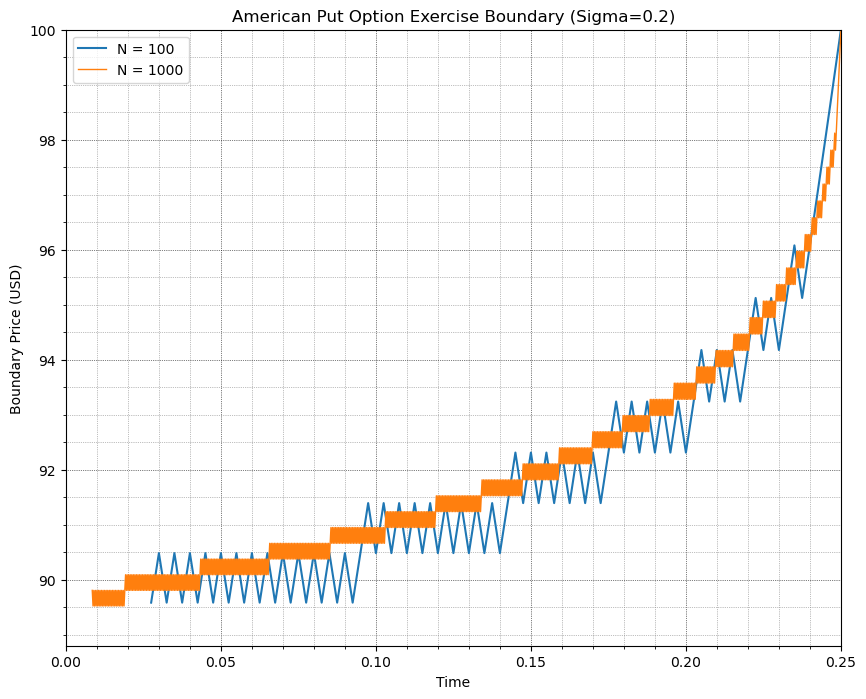

In [5]:
plt.plot(am_op_20_100[0], am_op_20_100[1], label="N = 100")
plt.plot(am_op_20_1000[0], am_op_20_1000[1], label="N = 1000", linewidth=1)
plt.gcf().set_size_inches(10, 8)
plt.grid(True)
plt.minorticks_on()
plt.grid(which='major', linestyle=':', linewidth='0.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')
plt.xlim(0,0.25)
plt.ylim(88.8, 100)
plt.xlabel('Time')
plt.ylabel('Boundary Price (USD)')
plt.legend()
plt.title("American Put Option Exercise Boundary (Sigma=0.2)")
plt.show()

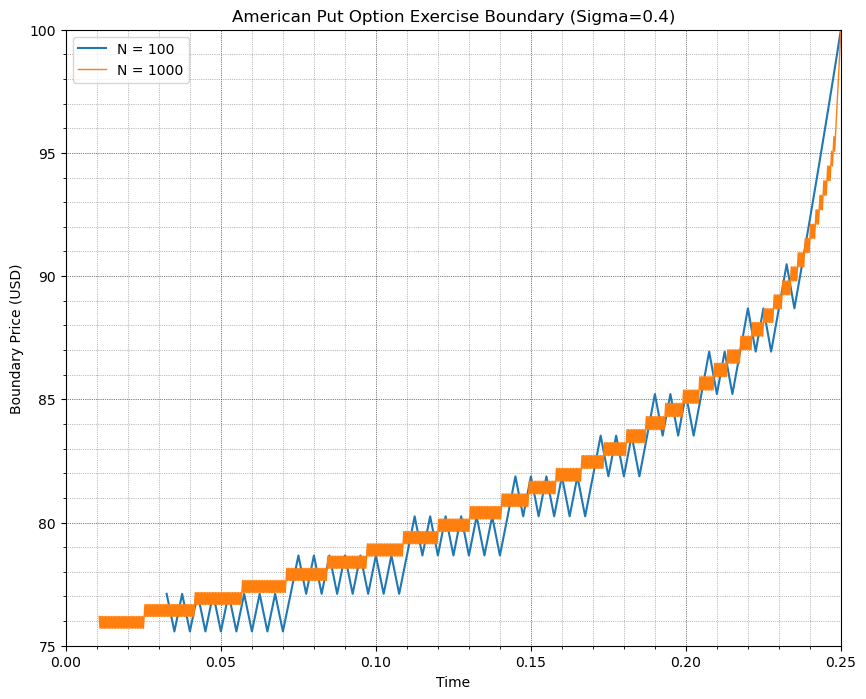

In [6]:
plt.plot(am_op_40_100[0], am_op_40_100[1], label="N = 100")
plt.plot(am_op_40_1000[0], am_op_40_1000[1], label="N = 1000", linewidth=1)
plt.gcf().set_size_inches(10, 8)
plt.grid(True)
plt.minorticks_on()
plt.grid(which='major', linestyle=':', linewidth='0.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')
plt.xlim(0,0.25)
plt.ylim(75, 100)
plt.xlabel('Time')
plt.ylabel('Boundary Price (USD)')
plt.legend()
plt.title("American Put Option Exercise Boundary (Sigma=0.4)")
plt.show()


Observations from the above two graphs:

First, both graphs exhibit a general behavior where the exercise boundary oscillates within a certain range, tending to converge towards the strike price \( K \) as time progresses. The difference between the two time periods lies in the fact that when n is 1000, the option's exercise boundary is observed earlier in the time frame compared to when n is 100.

Furthermore, it can be observed from the graphs that as time passes, the exercise boundary oscillates within a range for shorter and shorter periods, and towards the end, the exercise boundary rapidly converges to the strike price \( K \).

Additionally, for different values of sigma, it is noted that when sigma is lower, the lowest value of the exercise boundary at which the option is worth exercising, instead of holding, is higher compared to when sigma is higher. For reference, the lowest exercise boundary value when sigma is 0.2 is around 88.75 (USD), and when sigma is 0.4, the exercise boundary is around 75.4 (USD) for n is 100, and 75.2 (USD) when n is 1000 .

